# A Arte dos Derivativos

> Professor: Dr. Gustavo Monteiro de Athayde  
> Monitor: Sylvio Ximenez de Azevedo Neto - <<<sylvioxan@insper.edu.br>>  
> Data: 15/01/2025

In [1]:
# dependencies
from IPython.display import display, clear_output

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

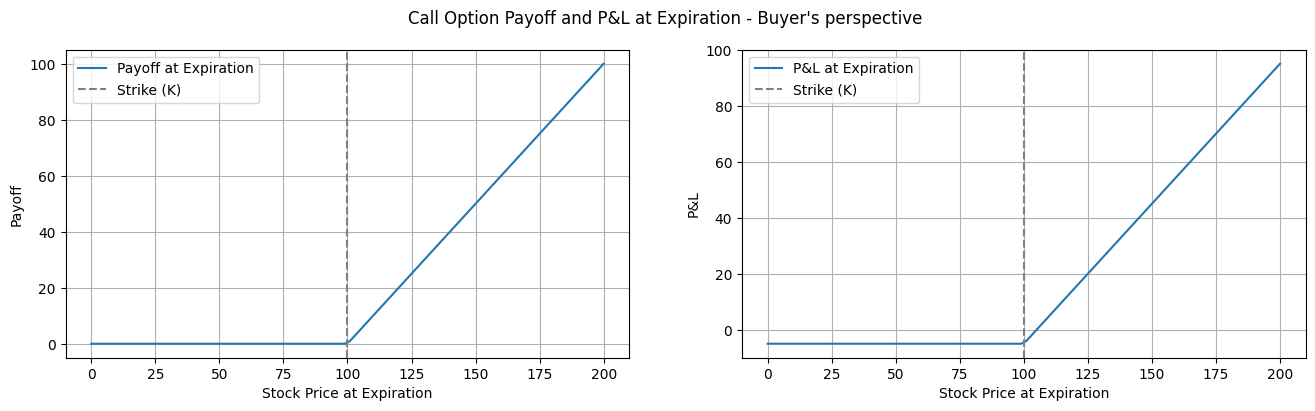

In [ ]:
# let's generate an example of Call option data to plot
# we will plot the call option payoff at expiration
# and the P&L (payoff - premium paid) at expiration

# strike price
K = 100

# premium paid
premium = 5

# stock price at expiration
S = np.linspace(0, 200, 100)

# call option payoff at expiration
payoff = np.maximum(S - K, 0)

# call option P&L at expiration
PnL = payoff - premium

# plot
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle('Call Option Payoff and P&L at Expiration - Buyer\'s perspective')
ax[0].plot(S, payoff, label='Payoff at Expiration')
ax[0].axvline(K, color='gray', linestyle='--', label='Strike (K)')
ax[0].set_xlabel('Stock Price at Expiration')
ax[0].set_ylabel('Payoff')
ax[0].legend()
ax[0].grid()
ax[1].plot(S, PnL, label='P&L at Expiration')
ax[1].axvline(K, color='gray', linestyle='--', label='Strike (K)')
ax[1].set_xlabel('Stock Price at Expiration')
ax[1].set_ylabel('P&L')
ax[1].grid()
ax[1].legend()
plt.show()

In [ ]:
# Exercise:  Generate same chart from the Seller's perspective


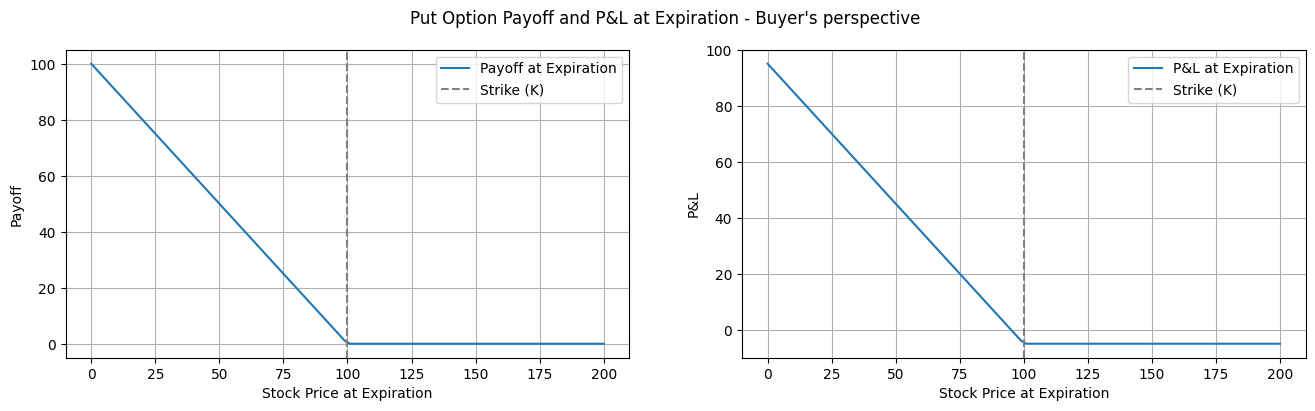

In [ ]:
# let's generate an example of Put option data to plot
# we will plot the put option payoff at expiration
# and the P&L (payoff - premium paid) at expiration

# strike price
K = 100

# premium paid
premium = 5

# stock price at expiration
S = np.linspace(0, 200, 100)

# put option payoff at expiration
payoff = np.maximum(K - S, 0)

# put option P&L at expiration
PnL = payoff - premium

# plot
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle('Put Option Payoff and P&L at Expiration - Buyer\'s perspective')
ax[0].plot(S, payoff, label='Payoff at Expiration')
ax[0].axvline(K, color='gray', linestyle='--', label='Strike (K)')
ax[0].set_xlabel('Stock Price at Expiration')
ax[0].set_ylabel('Payoff')
ax[0].legend()
ax[0].grid()
ax[1].plot(S, PnL, label='P&L at Expiration')
ax[1].axvline(K, color='gray', linestyle='--', label='Strike (K)')
ax[1].set_xlabel('Stock Price at Expiration')
ax[1].set_ylabel('P&L')
ax[1].grid()
ax[1].legend()
plt.show()

In [ ]:
# Exercise:  Generate same chart from the Seller's perspective


### Condições de não arbitragem

#### a) O prêmio das Calls decai com o aumento do strike (X) e o prêmio das Puts decai com a diminuição do strike (X).

Retrições de não arbitragem:

$ Call(X_{n}) \geq Call(X_{n+1}) \geq Call(X_{n+3}) \geq ... \geq Call(X_{n+m})$, para todo $n \geq 0 $ e $m > n$, portanto:

$ \frac{\partial Call(X)}{\partial X} \leq 0$ e $Call(X_{n}) - Call(X_{n-1}) \geq 0$ é uma função decrescente de K.

---

$ Put(X_{n}) \leq Put(X_{n+1}) \leq Put(X_{n+2}) \leq ... \leq Put(X_{n+m})$, para todo $n \geq 0 $ e $m > n$, portanto:

$ \frac{\partial P}{\partial X} \leq 0$ e $Put(X_{n-1}) - Put(X_{n}) \leq 0$ é uma função crescente de X.


Latex ref: https://en.wikipedia.org/wiki/LaTeX - https://en.wikipedia.org/wiki/TeX (Prof. Donald Knuth)

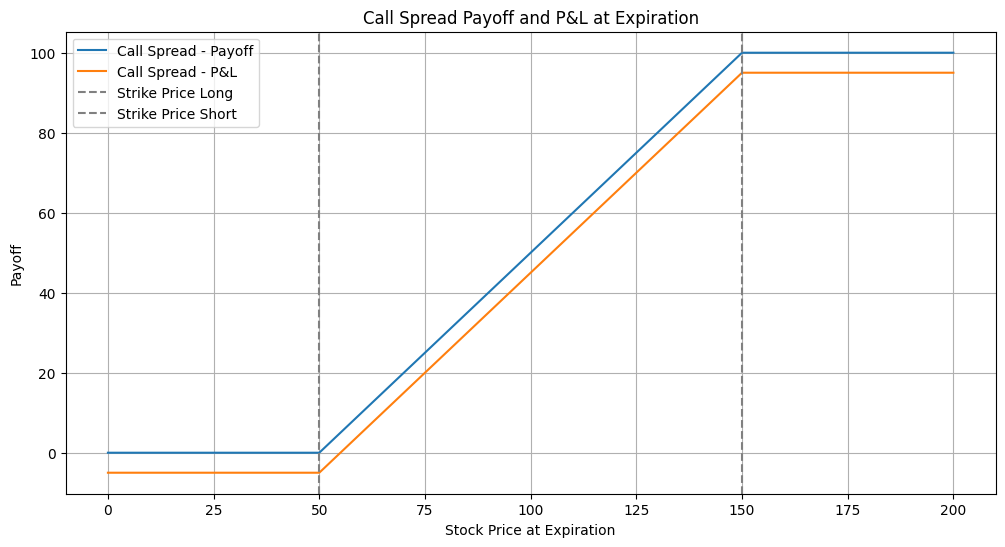

In [ ]:
### Call Spreads

# let's generate an example of a call spread structure
# we will plot the payoff of the option structure at expiration date

# strike price of the long call
K_long = 50

# strike price of the short call
K_short = 150

# premium of the long call
premium_long = 10

# premium of the short call
premium_short = 5

# stock price at expiration date
S = np.linspace(0, 200, 1000)

# payoff of the long call
payoff_long = np.maximum(S - K_long, 0)

# payoff of the short call
payoff_short = np.maximum(S - K_short, 0)

# payoff of the call spread
payoff = payoff_long - payoff_short

# p&l of the call spread
payoff_net = payoff_long - payoff_short - (premium_long - premium_short)

# plot
plt.figure(figsize=(12, 6))
plt.plot(S, payoff, label='Call Spread - Payoff')
plt.plot(S, payoff_net, label='Call Spread - P&L')
plt.axvline(K_long, color='gray', linestyle='--', label='Strike Price Long')
plt.axvline(K_short, color='gray', linestyle='--', label='Strike Price Short')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Call Spread Payoff and P&L at Expiration')
plt.legend()
plt.grid()
plt.show()

### Exercício colocar o payoff da call no gráfico...

Um pouquinho de python...

In [ ]:
# Option type enumeration
from enum import Enum

class OptionType(Enum):
    CALL = 1
    PUT = 2

def calc_payoff(S, K, type: OptionType):

    if type == OptionType.CALL:
        return np.maximum(S - K, 0)

    elif type == OptionType.PUT:
        return np.maximum(K - S, 0)

    else:
        raise ValueError('Option type not valid.')

    # return np.maximum(K - S, 0) if type == OptionType.PUT else np.maximum(S - K, 0)

def calc_call_payoff(S, K):
    return calc_payoff(S, K, OptionType.CALL)

def calc_put_payoff(S, K):
    return calc_payoff(S, K, OptionType.PUT)

line_styles = ['-', '--', '-.', ':']

### Criando uma biblioteca de funções

derivatives.py

#### Call Spreads com frações ($\epsilon$) de Calls

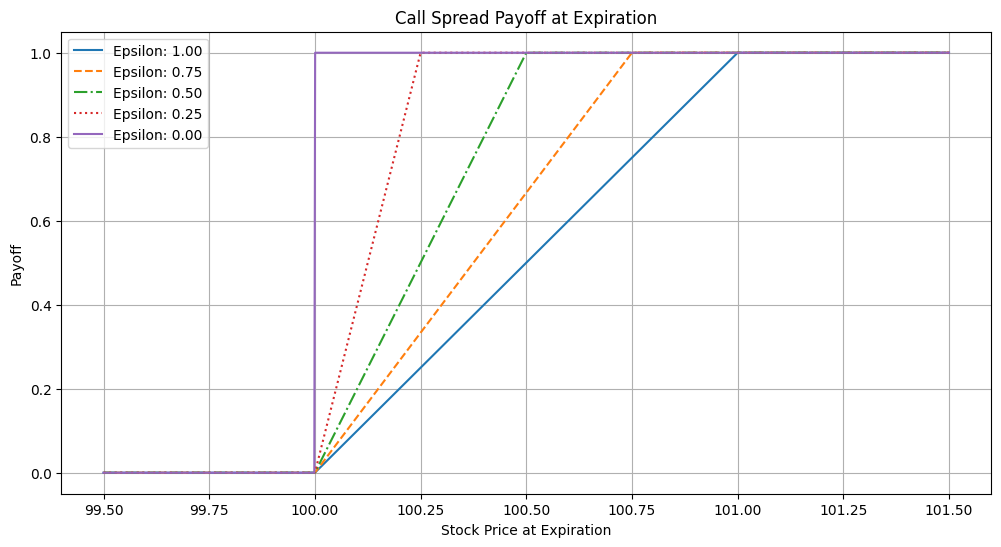

In [ ]:
# strike price of the long call
K_l = 100

# strike price of the short call
qte_e = 5
lim_zero = 0.000001
e = np.linspace(1, lim_zero, qte_e)
K_s = (K_l + e)

# Stock price at expiration date
S = np.linspace(99.5, 101.5, 1000)

# payoff of the long call
payoff_long = calc_call_payoff(S, K_l)

# payoff of the short call
payoff_short = [calc_call_payoff(S, K) for K in K_s]

# payoff of the call spread
payoff = [ (payoff_long - payoff_s)/_e for _e, payoff_s in zip(e, payoff_short)]

plt.figure(figsize=(12, 6))

count = 0
for _payoff, K in zip(payoff, K_s):
    plt.plot(S, _payoff, label=f'Epsilon: {e[count]:.2f}', linestyle=line_styles[count%4])
    count += 1

plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Call Spread Payoff at Expiration')
plt.legend()
plt.grid(True)
plt.show()

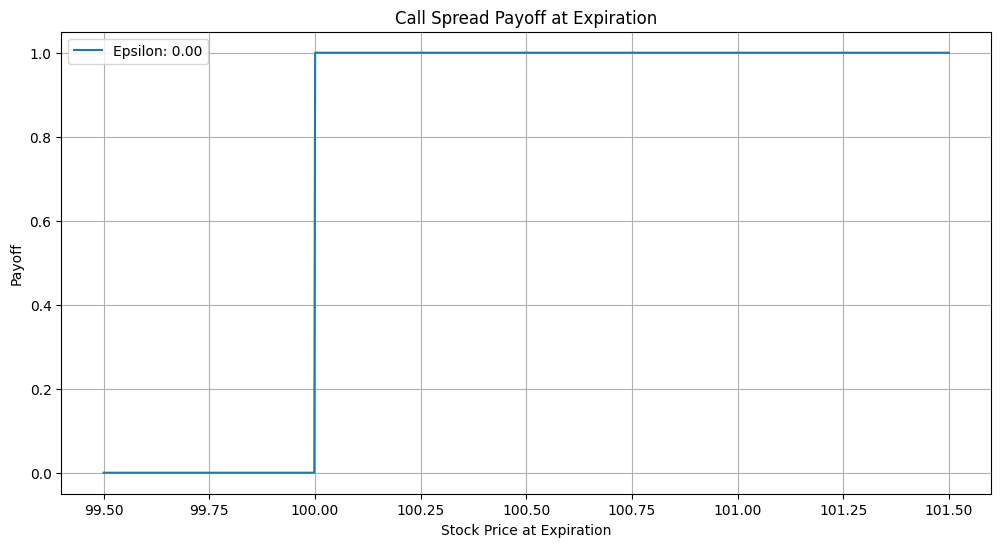

In [ ]:
S = np.linspace(99.5, 101.5, 1000)
i = qte_e-1

plt.figure(figsize=(12, 6))
plt.plot(S, payoff[i], label=f'Epsilon: {e[i]:.2f}', linestyle=line_styles[i%4])
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Call Spread Payoff at Expiration')
plt.legend()
plt.grid(True)
plt.show()

Trata-se de uma Opção Binária, também chamada de Digital, pois ela vale 1 se o preço do ativo-objeto for maior que o strike e 0 caso contrário, sem meio termo. Ou seja:

$$B_{Call}(X) = \lim_{\epsilon \rightarrow 0} \frac{Call(X) - Call(X+\epsilon)}{\epsilon} = - \frac{\partial Call(X)}{\epsilon} - - \frac{\partial Call(X)}{\partial X} $$

A opção binária é um caso de combinações de Calls. Nesse caso, nada mais que a derivada da Call em relação ao strike (K) vezes -1.

**Importante**: <span style='color: red'>Seja qual for o modelo utilizado para apreçar as Calls, a derivada da fórmula</span> ($\partial Call(X)$) <span style='color: red'>em relação ao strike</span> ($X$) <span style='color: red'>necessarimente dará a opção binária</span> ($B_{Call}(X)$). Caso o modelo da binária seja outro que não cumpra essa restrição, então este permitirá arbitragens.

In [ ]:
# binary (digital) option
def binary(S, K, type: OptionType):

    e = lim_zero

    if type == OptionType.CALL:
        return calc_payoff(S, K, OptionType.CALL) - calc_payoff(S, K + e, OptionType.CALL)

    elif type == OptionType.PUT:
        return calc_payoff(S, K, OptionType.PUT) - calc_payoff(S, K + e, OptionType.PUT)

    raise ValueError('Option type not valid.')

Jupyter Widgets - [Reference](https://ipywidgets.readthedocs.io/en/latest/)

In [ ]:

_k = widgets.FloatSlider(value=100, min=0, max=300, step=.05, description='K - Strike Price')

ui = widgets.HBox([_k])

S = np.linspace(0, 300, 1000)

def plot_binary(k):
    _b = binary(S, k, OptionType.CALL)
    plt.figure(figsize=(12, 6))
    plt.plot(S, _b, label='Binary Call Option - Payoff')
    plt.axvline(k, color='gray', linestyle='--', label='Strike Price')
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Payoff')
    plt.title('Binary Call Option Payoff at Expiration')
    plt.legend()
    plt.grid(True)
    plt.show()

out = widgets.interactive_output(plot_binary, {'k': _k})

clear_output(wait=True)

display(ui, out)

Output()

Seguindo a intuição, precebe-se que o preço de uma (Call) binária é o valor presente de algo que começa com 1, e vai decaindo à medida que K aumenta, até no limite chegar a 0. Essa intuição é correta, mas para uma garantia total que esse valor decaia K, do contrário haverá arbitragem, temos a seguinte condição (restrição):

#### b) O prêmio das Calls é convexo em relação ao strike (K).

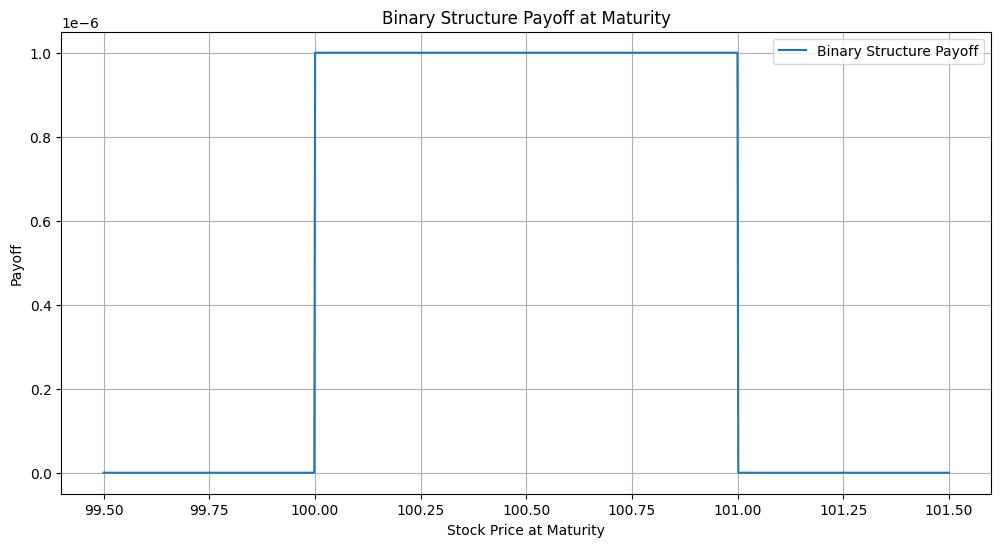

In [ ]:
S = np.linspace(99.5, 101.5, 1000)
K0 = 100
K1 = 101

B0 = binary(S, K0, OptionType.CALL)
B1 = binary(S, K1, OptionType.CALL)

plt.figure(figsize=(12, 6))
plt.plot(S, B0-B1, label=f'Binary Structure Payoff', linestyle=line_styles[i%4])
plt.xlabel('Stock Price at Maturity')
plt.ylabel('Payoff')
plt.title('Binary Structure Payoff at Maturity')
plt.legend()
plt.grid(True)
plt.show()

Condição não arbitragem: O preço das binárias tem que necessariamente decair com o Strike $X$. É um valor descrecente de 1 a 0. E, portanto, temos:

$$B_{Call}(X) = e^{-rT} \int_{X}^{\infty}p(S)ds$$

Onde p(S) é uma distribuição de probabilidades do ativo objeto ser igual a S na data do exercício.

A derivada da Binária em relação a $X$ é dado por:

$$\frac{\partial B_{Call}(X)}{\partial X} = -e^{-rT} p(x) $$

ou seja:

$$\frac{\partial^2 Call(X)}{\partial X^2} = -e^{-rT} p(x) $$


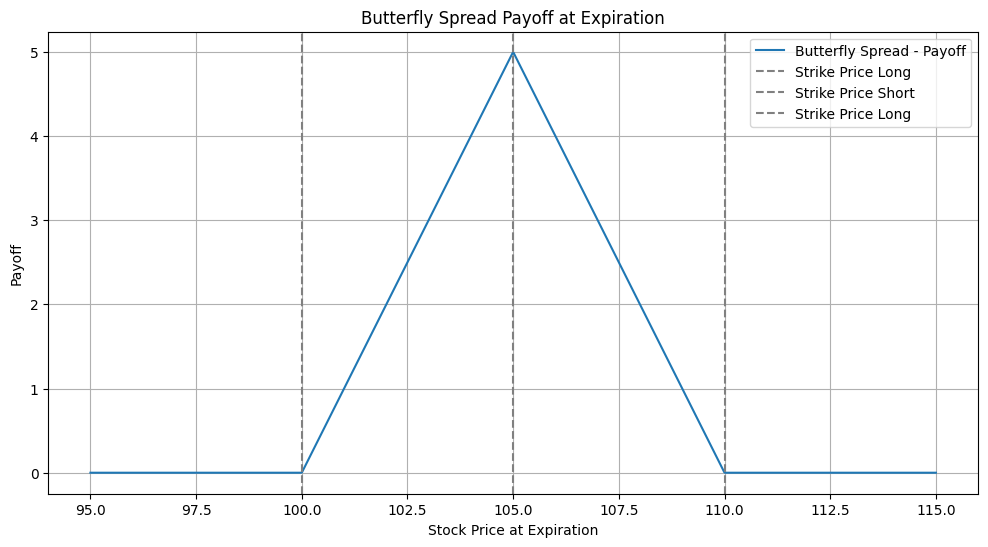

In [ ]:
# Lets create a butterfly spread
K0 = 100
K1 = 105
K2 = 110

# Stock price at expiration date
S = np.linspace(95, 115, 1000)

# payoff of the long call
payoff_0 = calc_call_payoff(S, K0)

# payoff of the short call
payoff_1 = calc_call_payoff(S, K1)

# payoff of the long call
payoff_2 = calc_call_payoff(S, K2)

# payoff of the call spread
payoff = payoff_0 - 2*payoff_1 + payoff_2

plt.figure(figsize=(12, 6))
plt.plot(S, payoff, label='Butterfly Spread - Payoff')
plt.axvline(K0, color='gray', linestyle='--', label='Strike Price Long')
plt.axvline(K1, color='gray', linestyle='--', label='Strike Price Short')
plt.axvline(K2, color='gray', linestyle='--', label='Strike Price Long')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Butterfly Spread Payoff at Expiration')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Exercíse - Plot a condor figure

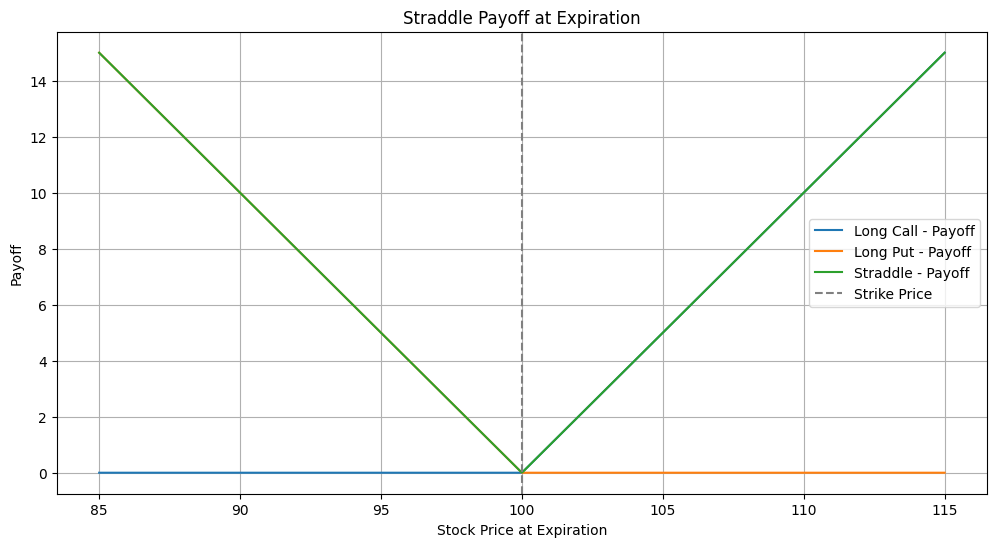

In [ ]:
### Let's create a straddle structure
K = 100

# Stock price at expiration date
S = np.linspace(85, 115, 1000)

# payoff of the long call
payoff_call = calc_call_payoff(S, K)

# payoff of the long put
payoff_put = calc_put_payoff(S, K)

# payoff of the straddle
payoff = payoff_call + payoff_put

plt.figure(figsize=(12, 6))
plt.plot(S, payoff_call, label='Long Call - Payoff')
plt.plot(S, payoff_put, label='Long Put - Payoff')
plt.plot(S, payoff, label='Straddle - Payoff')
plt.axvline(K, color='gray', linestyle='--', label='Strike Price')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Straddle Payoff at Expiration')
plt.legend()
plt.grid()
plt.show()

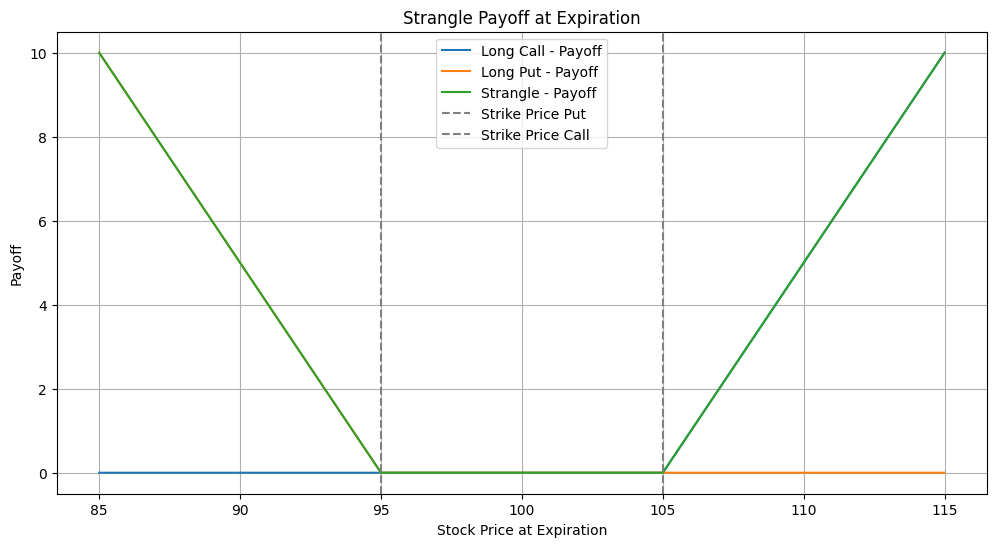

In [ ]:
# let's create a strangle structure

K1 = 95
K2 = 105

# Stock price at expiration date
S = np.linspace(85, 115, 1000)

# payoff of the long call
payoff_call = calc_call_payoff(S, K2)

# payoff of the long put
payoff_put = calc_put_payoff(S, K1)

# payoff of the strangle
payoff = payoff_call + payoff_put

plt.figure(figsize=(12, 6))
plt.plot(S, payoff_call, label='Long Call - Payoff')
plt.plot(S, payoff_put, label='Long Put - Payoff')
plt.plot(S, payoff, label='Strangle - Payoff')
plt.axvline(K1, color='gray', linestyle='--', label='Strike Price Put')
plt.axvline(K2, color='gray', linestyle='--', label='Strike Price Call')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Strangle Payoff at Expiration')
plt.legend()
plt.grid()
plt.show()